<a href="https://colab.research.google.com/github/Rohitv97/Data-Science-CE888/blob/master/Lab2/Lab2_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns

In [0]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]

In [0]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Create an array of samples of shape (n_iterations, sample_size)
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. In each iteration:
# 3.1 Get the data corresponding to that iteration (new_samples[iteration, :])
# 3.2 Calculate the mean of the iteration data and store it
# (At this point you should have an array of n_iterations values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def boostrap_mean(sample, sample_size, n_iterations):
  new_samples = np.random.choice(sample, size=(n_iterations, sample_size), replace=True)
  data_mean = np.mean(new_samples)

  mean_iter = []
  for i in new_samples:
    mean_iter.append(np.mean(i))

  CI = 90
  temp_rem = (100-CI)/2

  out = np.percentile(mean_iter, q=[temp_rem, CI + temp_rem])
  lower = out[0]
  upper = out[1]

  return data_mean, lower, upper

(0, 100000)

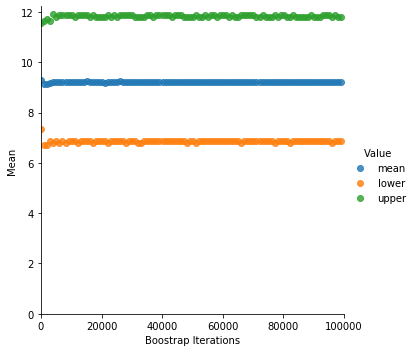

In [32]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')

In [0]:
def boostrap_mean_ci(sample, sample_size, iterations, ci):
  new_samples = np.random.choice(sample, size=(iterations, sample_size), replace=True)
  data_mean = np.mean(new_samples)

  mean_iter = []
  for i in new_samples:
    mean_iter.append(np.mean(i))

  CI = ci
  temp_rem = (100-CI)/2
  out = np.percentile(mean_iter, q=[temp_rem, CI + temp_rem])

  lower = out[0]
  upper = out[1]

  return data_mean, lower, upper

(0, 100000)

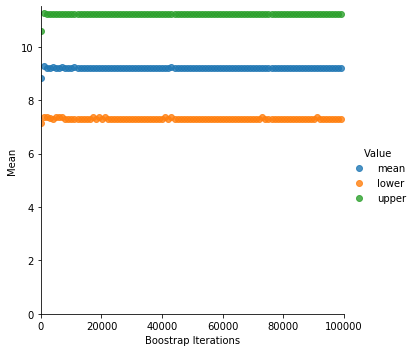

In [9]:
boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

# sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
# sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')

**Vehicles Dataset**

In [10]:
dataframe = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
dataframe

,Current fleet,New Fleet
0,18,24.0
1,15,27.0
2,18,27.0
3,16,25.0
4,17,31.0
...,...,...
244,27,NaN
245,27,NaN
246,32,NaN
247,28,NaN


In [0]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1e0c3e8668>,
      dtype=object)

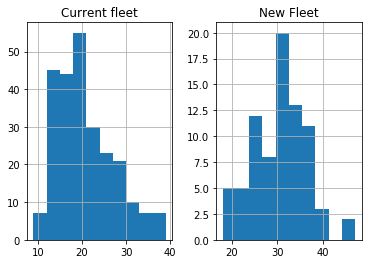

In [15]:
pd.DataFrame.hist(dataframe)

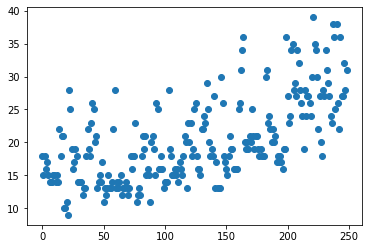

In [26]:
val = len(dataframe['Current fleet'])
x = np.arange(0, val, 1)
y = dataframe.iloc[:, 0]
plt.scatter(x, y)

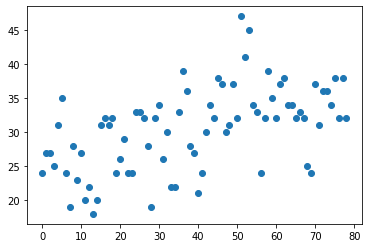

In [29]:
val = len(dataframe['New Fleet'])
x = np.arange(0, val, 1)
y = dataframe.iloc[:, 1]
plt.scatter(x, y)

**Bootstrap on Vehicles**

In [0]:
current = dataframe['Current fleet']
proposed = dataframe['New Fleet'].dropna()

In [0]:
def permute(current, proposed, itera):
  # bootstrap_current = boostrap_mean_ci(current, len(current), 100, 90)
  # bootstrap_proposed = boostrap_mean_ci(proposed, len(proposed), 100, 90)

  # print('Mean \t\t LB \t\t UP\n')
  # print(np.subtract(bootstrap_proposed, bootstrap_current))
  # main_val = np.subtract(bootstrap_proposed, bootstrap_current)

  main_val = np.subtract(np.mean(proposed), np.mean(current))
  concat = np.concatenate((current, proposed))

  count = 0

  for i in range(itera):
    perm = np.random.permutation(concat)
    p_current = perm[:len(current)]
    p_proposed = perm[len(current):]

    # bootstrap_current = boostrap_mean_ci(p_current, len(p_current), 100, 90)
    # bootstrap_proposed = boostrap_mean_ci(p_proposed, len(p_proposed), 100, 90)
    # new_val = np.subtract(bootstrap_proposed, bootstrap_current)
    
    new_val = np.subtract(np.mean(p_proposed), np.mean(p_current))
    
    if(new_val > main_val):
      count += 1

  p_value = count/itera
  
  return p_value


In [126]:
old = np.array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0])
new = np.array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1])
permute(old, new, 20000)

0.0714

In [123]:
permute(current, proposed, 20000)

0.0